## Expenditures and Nutrients vs. \log\lambda



/home/ethanligon/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


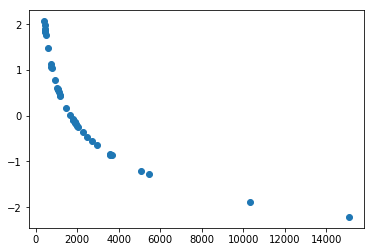

/home/ethanligon/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ethanligon/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 2.,  0.,  2.,  5., 10.,  3.,  6.,  4.,  1.,  7.]),
 array([-2.22053213, -1.79129352, -1.36205492, -0.93281631, -0.50357771,
        -0.0743391 ,  0.3548995 ,  0.78413811,  1.21337671,  1.64261532,
         2.07185392]),
 <a list of 10 Patch objects>)

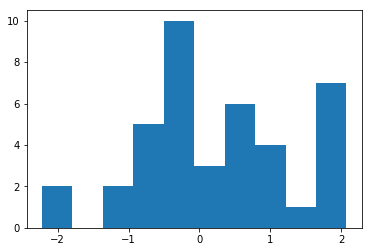

In [4]:
%matplotlib inline
import cfe
import pandas as pd
import pylab as pl

r0 = cfe.from_dataset('result.ds')

# Turn off variation in household composition
r0['z'] = r0['z']*0

l0 = r0.loglambdas.sel(t=75,m='A')

# Predicted total expenditures given lambda & prices
x0 = r0.get_predicted_expenditures().sum('i').sel(t=75,m='A')

pl.scatter(x0,l0)
pl.show()
pl.hist(l0)

Now consider nutrients:



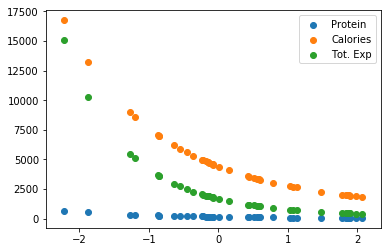

In [3]:
# This will be in expenditures, but everyone faces same prices,
# so relative nutrition will be correct.
Q = r0.get_predicted_expenditures().sel(t=75,m='A',drop=True).to_dataframe('q')
Q = Q.unstack('i')
Q.columns = Q.columns.droplevel(0)

fct = pd.read_pickle('fct.df')

# Intersection of foods in Q and fct0
use = list(set(fct.index.tolist()).intersection(Q.columns))

# Inner product of quantities of food and FCT gives nutrients
N = Q[use].dot(fct.loc[use,:])

# Nutrients per day
N = N.groupby(['j']).sum()/365

pl.scatter(l0,N['pu_prot'])
pl.scatter(l0,N['pu_cal'])
pl.scatter(l0,x0)
pl.legend(['Protein','Calories','Tot. Exp'])
pl.show()